# Project 5 – Feature Importance, Dimensionality Reduction, KNN

Κωνσταντίνα Μαρίνα Μπλέτσα, ΑΕΜ: 243

# Εισαγωγή Βιβλιοθηκών

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from google.colab import files
from PIL import Image

# Ερώτημα 1 Εισαγωγή Δεδομένων

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Train images:", x_train.shape)
print("Test images:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


# Ερώτημα 2

Εμφάνιση 1 πλοτ για κάθε ψηφίο

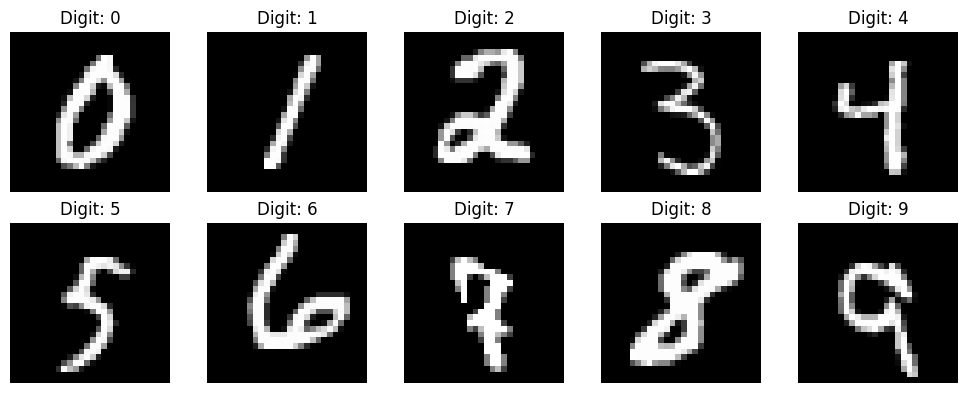

In [ ]:
plt.figure(figsize=(10, 4))

for digit in range(10):
    idx = np.where(y_train == digit)[0]
    random_idx = np.random.choice(idx)
    img = x_train[random_idx]

    plt.subplot(2, 5, digit + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Ερώτημα 3

Τι μέγεθος έχει κάθε εικόνα? Είναι σημαντικά όλα τα pixel της εικόνας ενός ψηφίου?

Κάθε εικόνα του MNIST έχει μέγεθος 28×28 pixels, άρα συνολικά 784. Δεν είναι όλα τα pixels εξίσου σημαντικά, επειδή το πιο μεγάλο μέρος της εικόνας αποτελείται από μαύρο φόντο και δεν προσφέρει πληροφορία για τη μορφή του ψηφίου. Η χρήσιμη πληροφορία βρίσκεται στα pixels που σχηματίζουν τις γραμμές του ψηφίου, δηλαδή εκεί όπου υπάρχει πραγματική μεταβολή και διαφοροποίηση μεταξύ της άσπρης γραμμης και του μαύρου φοντου.

# Ερώτημα 4

Μετατροπή των εικόνων (x_train, x_test) σε διανύσματα

In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_flat = x_test.reshape(x_test.shape[0], 28 * 28)

# Ερώτημα 5

Εκπαίδευση Ταξινομητή KNN με k=5,15,51,√N

k=5 Train Accuracy: 0.9819, Test Accuracy: 0.9688
k=15 Train Accuracy: 0.9710, Test Accuracy: 0.9633
k=51 Train Accuracy: 0.9532, Test Accuracy: 0.9533
k=244 Train Accuracy: 0.9211, Test Accuracy: 0.9241


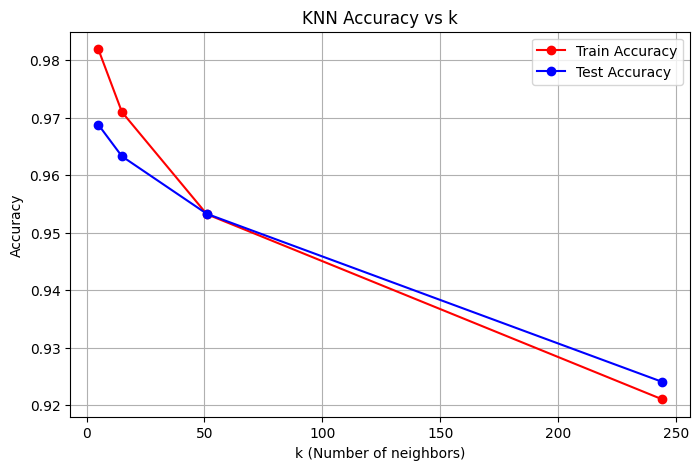

In [ ]:
N = x_train_flat.shape[0]
k_values = [5, 15, 51, int(math.sqrt(N))]
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)

    y_train_pred = knn.predict(x_train_flat)
    y_test_pred = knn.predict(x_test_flat)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"k={k} Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracies, marker='o', color='red',label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', color='blue',label='Test Accuracy')
plt.xlabel('k (Number of neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k')
plt.legend()
plt.grid(True)
plt.show()

# Ερώτημα 6

Κανονικοποίηση των τιμών των pixel μεταξύ [0, 1] και επαναλάληψη του ερωτήματος 5

Training KNN with k=5
k=5  Train Accuracy: 0.9819, Test Accuracy: 0.9688
Training KNN with k=15
k=15  Train Accuracy: 0.9710, Test Accuracy: 0.9633
Training KNN with k=51
k=51  Train Accuracy: 0.9532, Test Accuracy: 0.9533
Training KNN with k=244
k=244  Train Accuracy: 0.9211, Test Accuracy: 0.9241


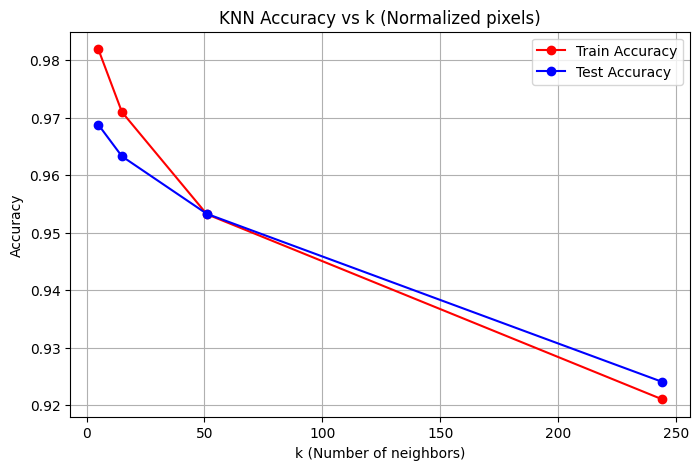

In [ ]:
x_train_norm = x_train_flat / 255.0
x_test_norm = x_test_flat / 255.0

N = x_train_norm.shape[0]
k_values = [5, 15, 51, int(math.sqrt(N))]
train_accuracies = []
test_accuracies = []

for k in k_values:
    print(f"Training KNN with k={k}")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train_norm, y_train)

    y_train_pred = knn.predict(x_train_norm)
    y_test_pred = knn.predict(x_test_norm)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"k={k}  Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracies, marker='o', color='red', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', color='blue',label='Test Accuracy')
plt.xlabel('k (Number of neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k (Normalized pixels)')
plt.legend()
plt.grid(True)
plt.show()


Τα αποτελέσματα και στο ερωτημα 5 και στο ερώτημα 6 είναι ακριβώς τα ίδια, αυτό πιθανά δείχνει οτι τα δεδομένα δεν χρειαζόντουσαν κανονικοποίηση για την καλύτερη απόδοση του μοντέλου

# Ερώτημα 7

Ταξινόμηση εικόνας από τον ταξινομητή με την κανονικοποίηση

Saving numberr4.png to numberr4 (1).png


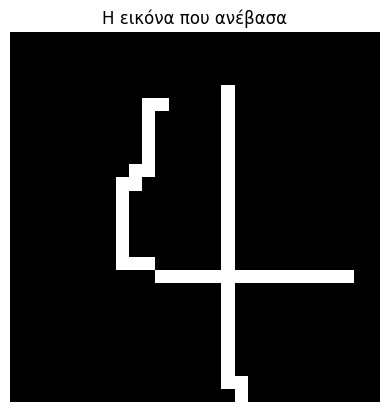


 Ο ταξινομητής προβλέπει ότι το ψηφίο είναι: 4


In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = Image.open(filename)
img = img.resize((28, 28))
img = img.convert('L')

img_array = np.array(img)

plt.imshow(img_array, cmap='gray')
plt.title("Η εικόνα που ανέβασα")
plt.axis('off')
plt.show()

img_vector = img_array.flatten() / 255.0

predicted_digit = knn.predict([img_vector])[0]

print("\n Ο ταξινομητής προβλέπει ότι το ψηφίο είναι:", predicted_digit)